In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [16]:
ratings_amazon = pd.read_csv('C:\\Users\\stann\\OneDrive\\Documents\\datasets\\amazon_Beauty_productreview.csv')
ratings_amazon = ratings_amazon.dropna()
ratings_amazon.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200


In [17]:
ratings_amazon.shape

(1048575, 4)

In [19]:
ratings_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserId     1048575 non-null  object
 1   ProductId  1048575 non-null  object
 2   Rating     1048575 non-null  int64 
 3   Timestamp  1048575 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


In [21]:
ratings_amazon.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [22]:
ratings_amazon.duplicated().sum()

0

In [24]:
print('The number of users are :',len(ratings_amazon.UserId.unique()))

The number of users are : 736653


In [26]:
print('The number of products are:',len(ratings_amazon.ProductId.unique()))

The number of products are: 97987


In [27]:
print('The number of ratings are :',ratings_amazon.shape[0])

The number of ratings are : 1048575


In [31]:
products_rating = pd.DataFrame(ratings_amazon.groupby('ProductId')['Rating'].count())
most_popular = products_rating.sort_values('Rating', ascending=False)
most_popular

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0000YUXI0,2143
B000ZMBSPE,2041
B003BQ6QXK,1918
...,...
B001NRE61I,1
B000N4B02K,1
B000N4AO18,1


In [32]:
user_ratings=ratings_amazon.groupby('UserId')['Rating'].count().sort_values(ascending=False)
user_ratings.head()

UserId
A3M174IC0VXOS2    278
A281NPSIMI1C2R    245
A1RRMZKOMZ2M7J    200
A3KEZLJ59C1JVH    178
A2V5R832QCSOMX    173
Name: Rating, dtype: int64

In [33]:
len(ratings_amazon[ratings_amazon.Rating==5]['ProductId'].unique())/len(ratings_amazon['ProductId'].unique())

0.8469286742118852

In [34]:
'''5 Rating is more than 80% i.e. 84.7'''

'5 Rating is more than 80% i.e. 84.7'

In [35]:
user_ratings.head()

UserId
A3M174IC0VXOS2    278
A281NPSIMI1C2R    245
A1RRMZKOMZ2M7J    200
A3KEZLJ59C1JVH    178
A2V5R832QCSOMX    173
Name: Rating, dtype: int64

In [40]:
high_rate=ratings_amazon[ratings_amazon.Rating==5]
rate4=ratings_amazon[ratings_amazon.Rating==4]
rate3=ratings_amazon[ratings_amazon.Rating==3]
rate2=ratings_amazon[ratings_amazon.Rating==2]
low_rate=ratings_amazon[ratings_amazon.Rating==1]


In [41]:
print('The number of users who make 5 rate on products is :',len(high_rate['UserId'].unique()))
print('The number of users who make 4 rate on products is :',len(rate4['UserId'].unique()))
print('The number of users who make 3 rate on products is :',len(rate3['UserId'].unique()))
print('The number of users who make 2 rate on products is :',len(rate2['UserId'].unique()))
print('The number of users who make 1 rate on products is :',len(low_rate['UserId'].unique()))

The number of users who make 5 rate on products is : 502090
The number of users who make 4 rate on products is : 129426
The number of users who make 3 rate on products is : 72857
The number of users who make 2 rate on products is : 52660
The number of users who make 1 rate on products is : 86977


<Axes: title={'center': 'The amazon beauty product rating representaion '}>

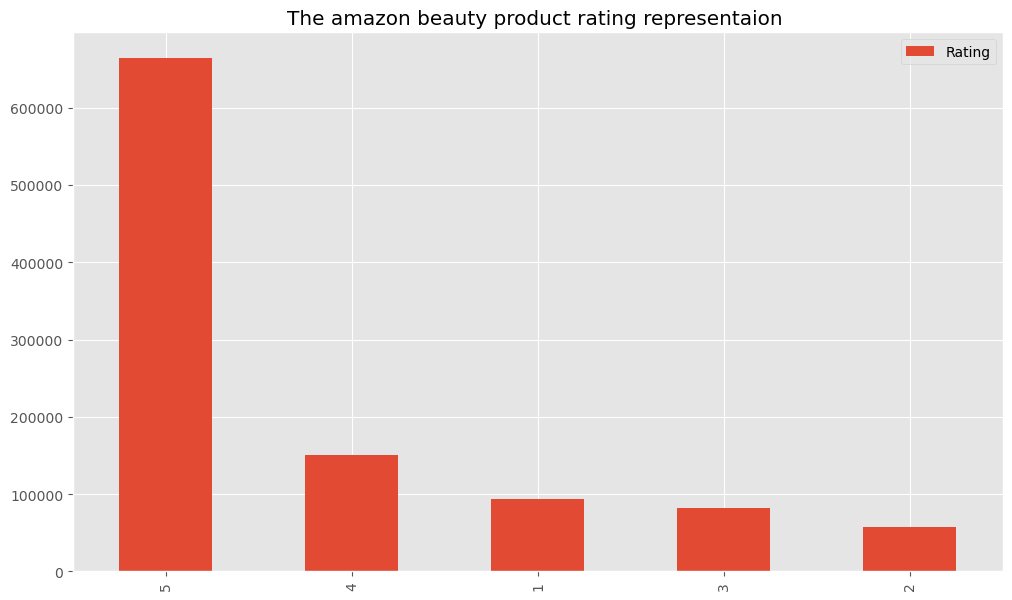

In [49]:
ratings_amazon.Rating.value_counts().to_frame().plot(kind='bar',figsize=(12,7),title='The amazon beauty product rating representaion ')